# Travelling Salesman Problem by Genetic Algorithm

## Travelling Salesman Problem

Travelling Salesman Problem is a situation in which a salesman is allowed to travel n number of cities, with the following conditions-
1. Salesman has to visit each city only once.
2. Salesman has to finish at the city he has started.

The possible paths between any 2 cities is (N-1).

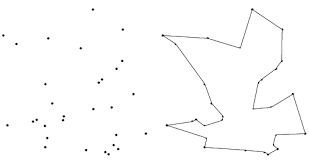





## Genetic Algorithm

Genetic Algorithm  works as _search heuristic_. 

It is used as an excellent method of solving some very interesting AI problems.
They work on the motive of _Survival of the Fittest_. In genetic algorithm, combinational expansion is handled.

The basic operations in genetic algorithm includes -
1. Selection : Selects the best entries of the population.
2. Crossover : Recombines the entries to produce next generation.
3. Mutation : Adds randomness to the reproduction process.

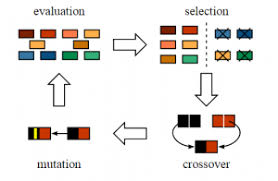

## About the Project

In this project, the 7 cities are taken and approx distance between them. Using the python libraries the various  possiblities and selections of path are printed.

Using Genetic Algorithm, an optimal solution is shown which satisfies the conditions of Travelling Salesman Problem.

In [113]:
import numpy as np
import random
import operator
import matplotlib.pyplot as plt
import math
import pandas as pd

In [114]:
def cities_distance(cities):
    data = dict()
    for index, value in enumerate(cities):
        x1 = cities[index][0]
        y1 = cities[index][1]
        if index + 1 <= len(cities)-1:
            x2 = cities[index+1][0]
            y2 = cities[index+1][1]
            xd = x2 - x1
            yd = y2 - y1
            dst = (xd*xd + yd*yd)** 0.5
            data['Distance from city '+ str(index+1) +' to city ' + str(index+2)] = dst 
        elif index + 1 > len(cities)-1:
            x2 = cities[0][0]
            y2 = cities[0][1]
            xd = x2 - x1
            yd = y2 - y1
            dst = (xd*xd + yd*yd)** 0.5
            data['Distance from city '+ str(index+1) + ' to city ' + str(index +2 -len(cities))] = dst
              
    return data

In [115]:
List_of_cities  = [[65.378105,18.672019],[82.08761,17.85475],[73.612347,24.664800],[77.854255,18.516726]
             ,[81.1588775,28.618277],[70.0411262,25.3790092],[76.797371,35.083656]]

'''  [[77.580643,12.972442],[72.88261,19.07283],[77.216721,28.644800],[73.856255,18.516726]
             ,[85.158875,25.612677],[80.9231262,26.8392792],[74.797371,34.083656]]  '''

val = cities_distance(List_of_cities).values()

In [116]:
print(val)

dict_values([16.729479548491213, 10.872298005558392, 7.4694442490683315, 10.62835182298306, 11.580036694620995, 11.824847284860693, 19.99353558024505])


In [117]:
def totaldist(cities):
    total = sum(cities_distance(cities).values())
    return total
totaldist(List_of_cities)



89.09799318582773

In [118]:
def path_gen(cities):
    path = random.sample(cities, len(cities))
    return path
list= path_gen(List_of_cities)
print(list)

[[82.08761, 17.85475], [73.612347, 24.6648], [81.1588775, 28.618277], [65.378105, 18.672019], [70.0411262, 25.3790092], [76.797371, 35.083656], [77.854255, 18.516726]]


In [119]:
import numpy as np
city_names = ['Kalyani', 'Ranaghat', 'Sealdah', 'Bidhannagar','Naihati','Halisahar','DumDum']
def plot_p(cities):
    plt.figure(figsize=(20,10))
    x = [i[0] for i in cities]
    y = [i[1] for i in cities]
    x1=[x[0],x[-1]]
    y1=[y[0],y[-1]]
    plt.plot(x, y, 'b', x1, y1, 'b')
    plt.scatter (x, y)
    j =[65.378105,82.08761,73.612347, 77.854255, 81.1588775,70.0411262,76.797371]
    k = [18.672019, 17.85475, 24.664800, 18.516726,28.618277,25.3790092,35.083656]
   
    
    for i, txt in enumerate(city_names):
        plt.annotate(txt, (j[i], k[i]),horizontalalignment='center', 
            #verticalalignment='bottom',
                    )
    plt.show()
    return 

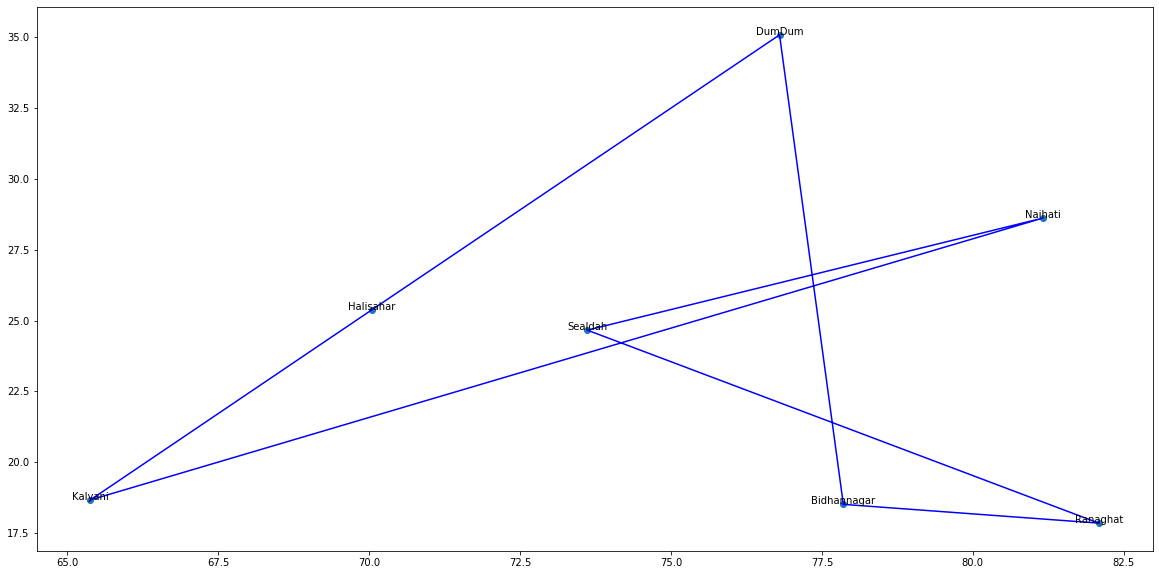

In [120]:
plot_p(list)


In [121]:
def initialPopulation(cities, populationSize):
    population = [path_gen(cities) for i in range(0, populationSize)]
    return population
population = initialPopulation(List_of_cities,10)


In [122]:
for index, p_plot in enumerate (population):
    print('Initial Population '+ str(index),p_plot)

Initial Population 0 [[65.378105, 18.672019], [77.854255, 18.516726], [76.797371, 35.083656], [81.1588775, 28.618277], [82.08761, 17.85475], [73.612347, 24.6648], [70.0411262, 25.3790092]]
Initial Population 1 [[81.1588775, 28.618277], [76.797371, 35.083656], [73.612347, 24.6648], [77.854255, 18.516726], [65.378105, 18.672019], [70.0411262, 25.3790092], [82.08761, 17.85475]]
Initial Population 2 [[82.08761, 17.85475], [70.0411262, 25.3790092], [65.378105, 18.672019], [73.612347, 24.6648], [81.1588775, 28.618277], [76.797371, 35.083656], [77.854255, 18.516726]]
Initial Population 3 [[81.1588775, 28.618277], [73.612347, 24.6648], [65.378105, 18.672019], [76.797371, 35.083656], [70.0411262, 25.3790092], [82.08761, 17.85475], [77.854255, 18.516726]]
Initial Population 4 [[65.378105, 18.672019], [77.854255, 18.516726], [70.0411262, 25.3790092], [73.612347, 24.6648], [81.1588775, 28.618277], [76.797371, 35.083656], [82.08761, 17.85475]]
Initial Population 5 [[70.0411262, 25.3790092], [82.087

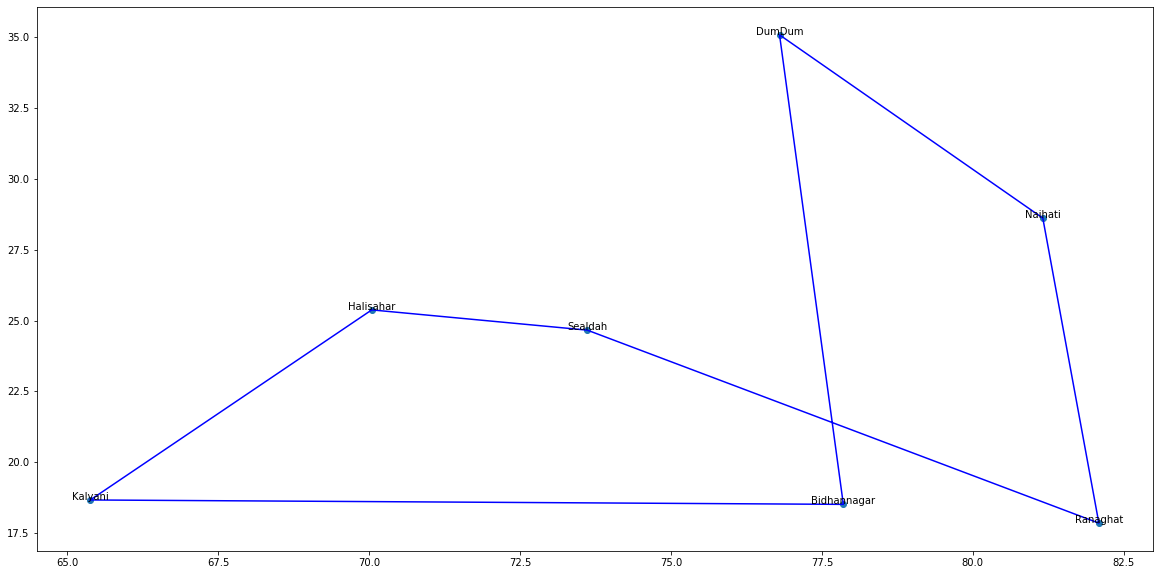

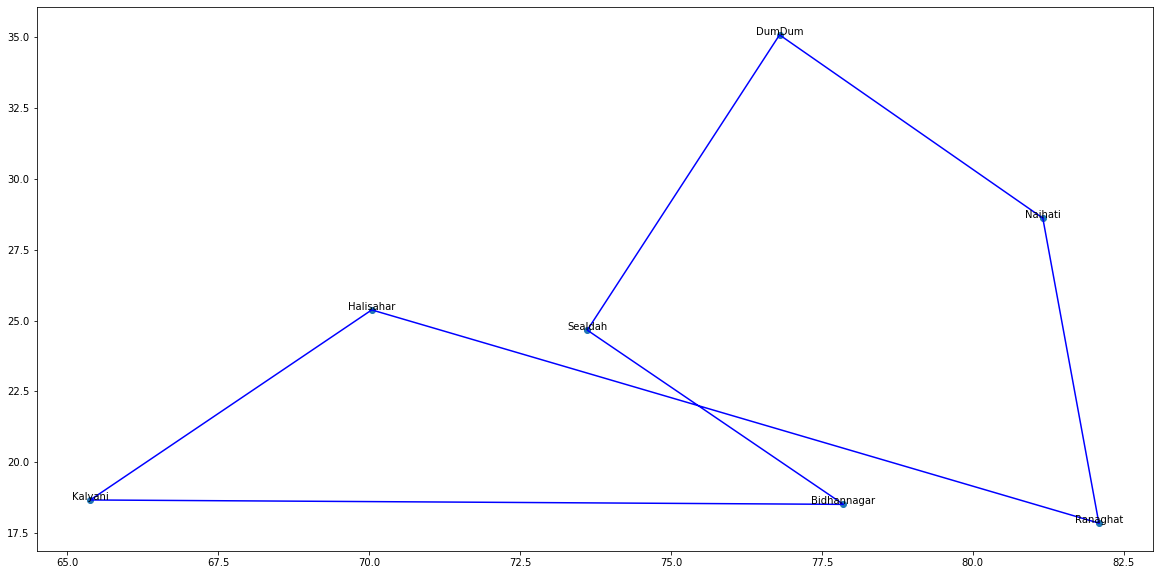

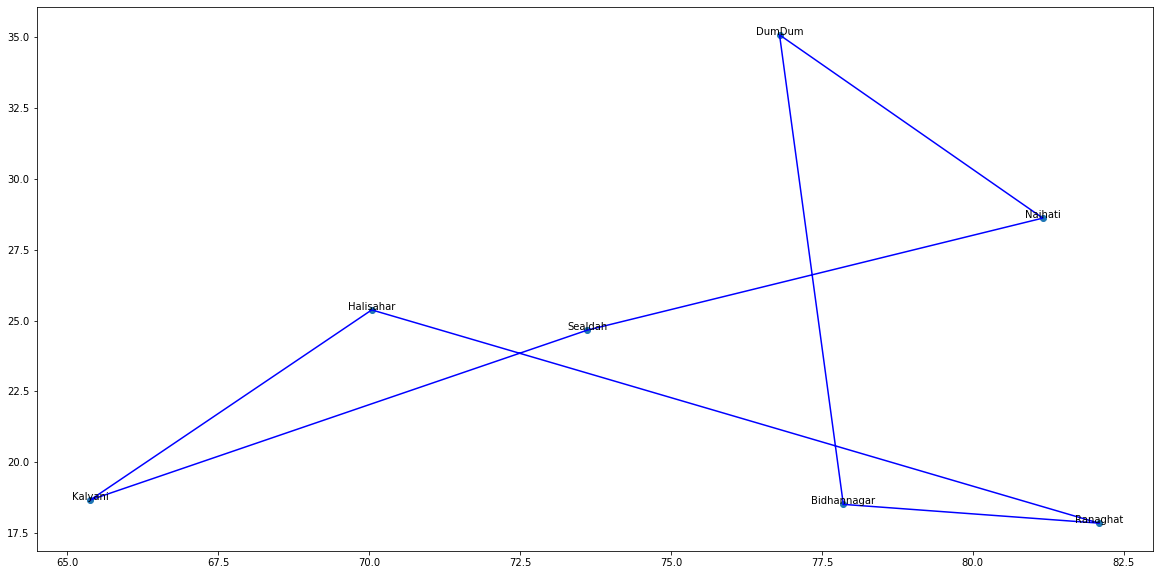

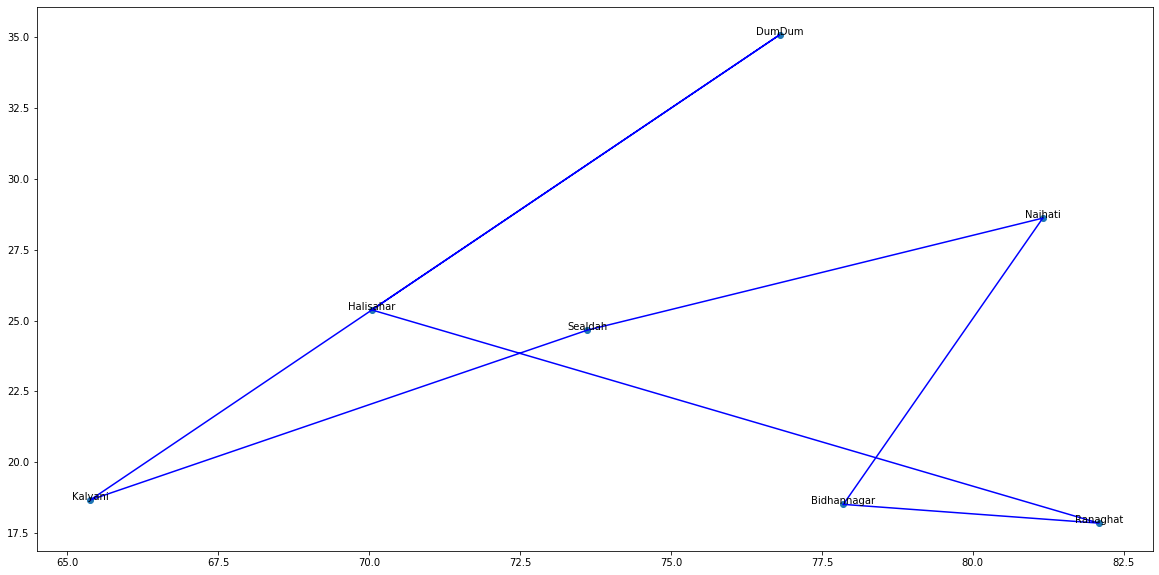

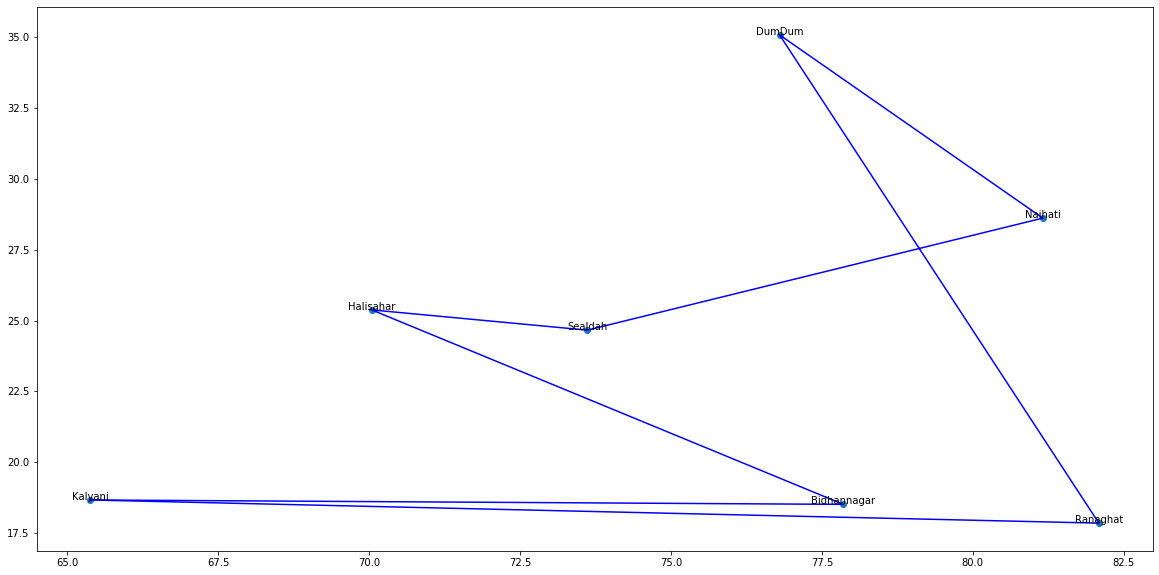

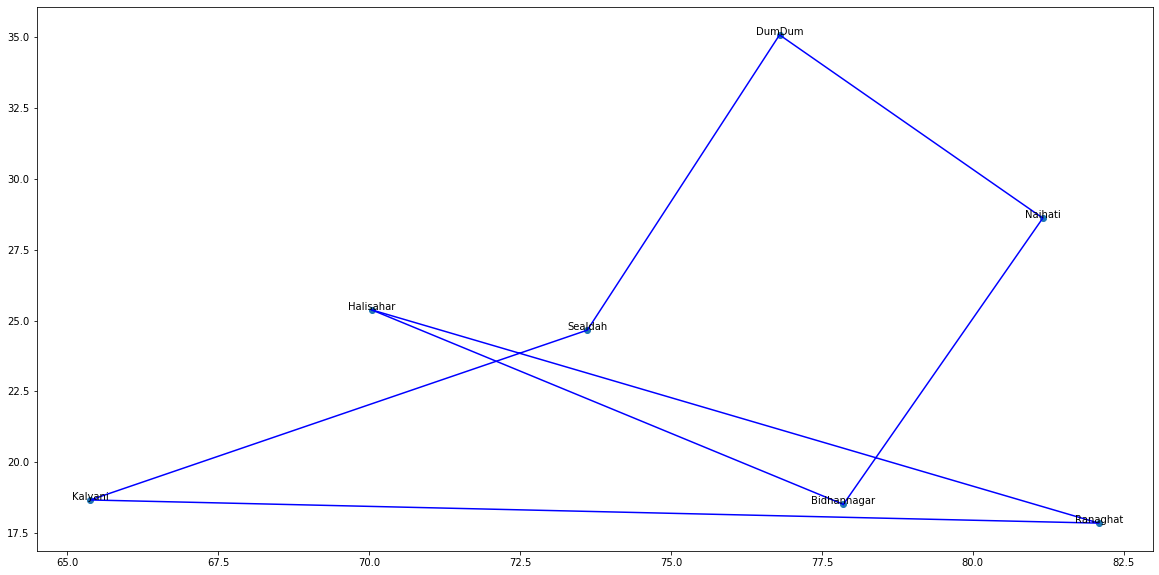

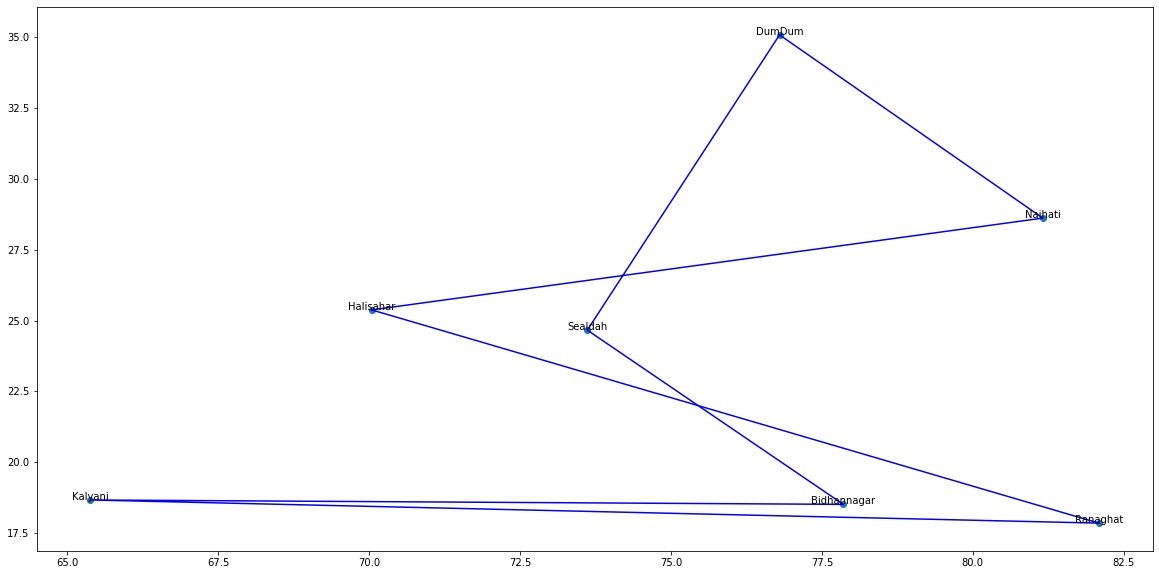

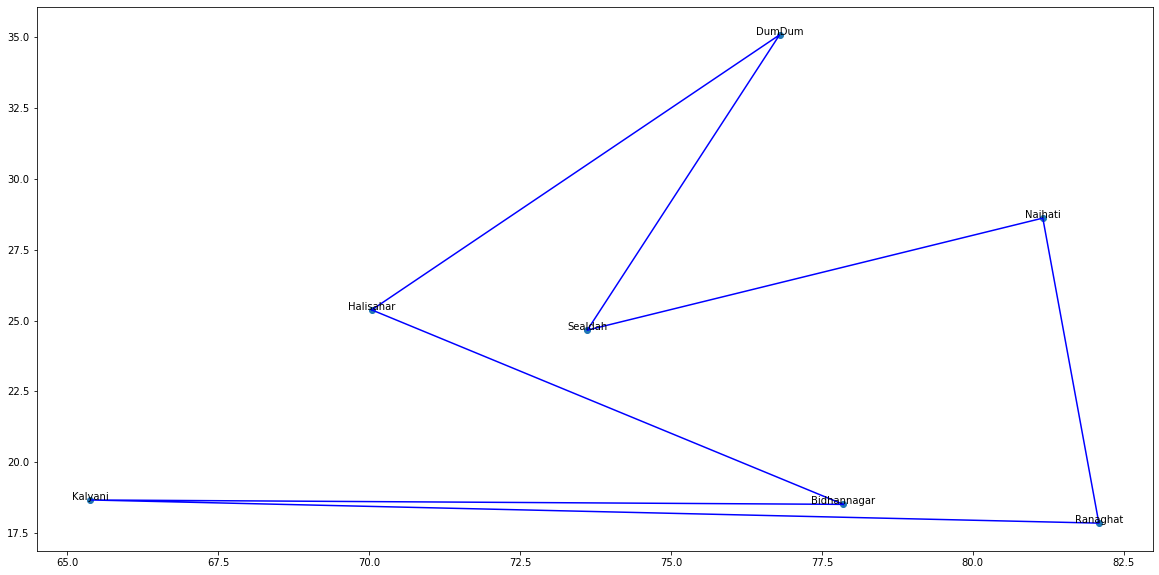

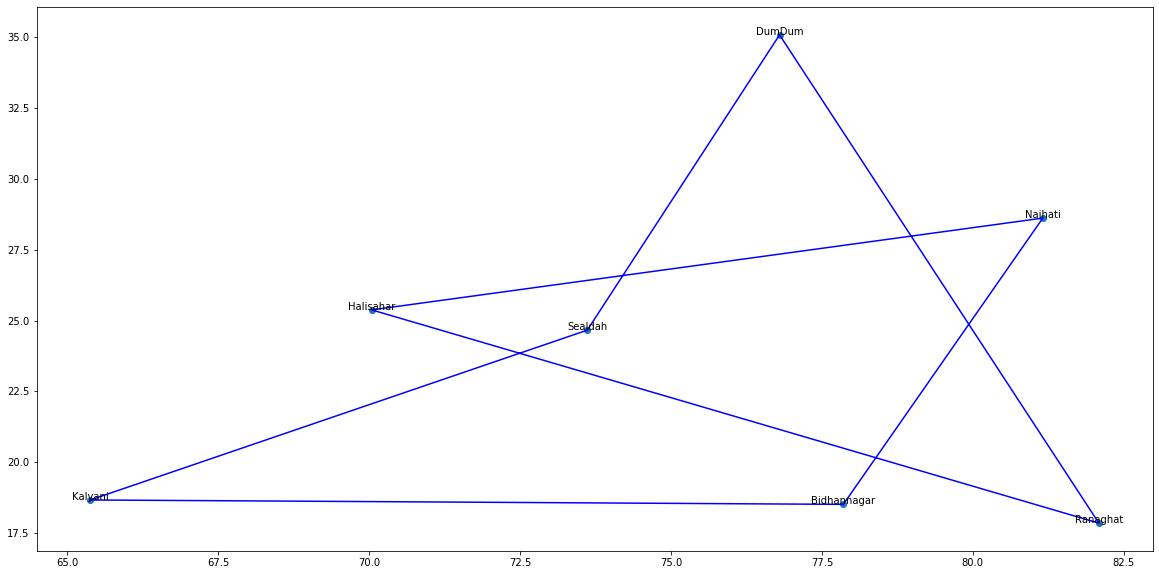

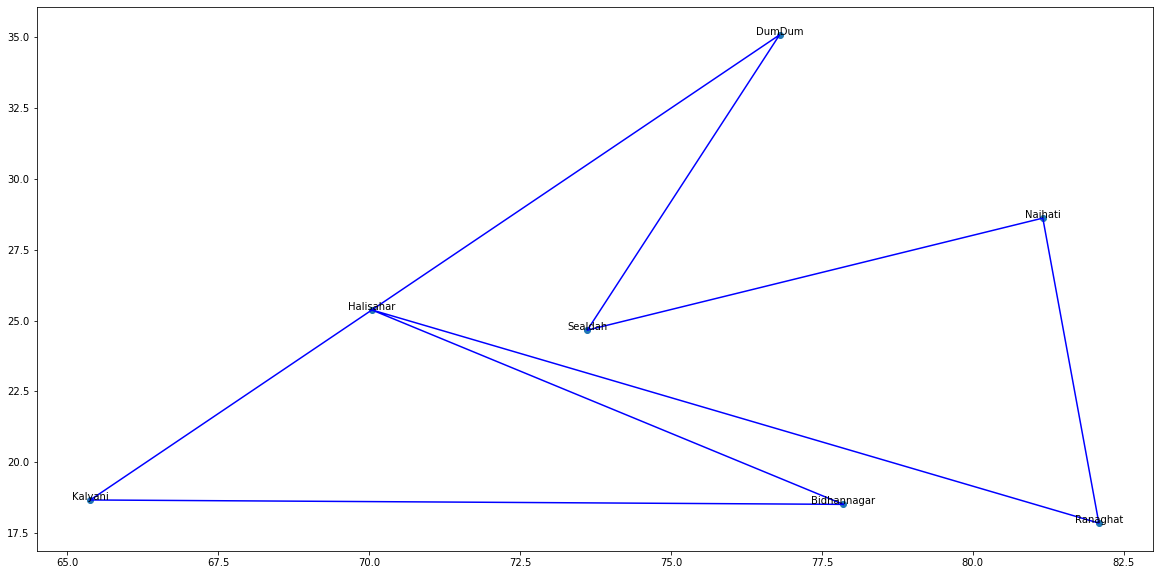

In [123]:
for p_plot in population:
    plot_p(p_plot)


In [124]:
def path_fitness(cities):
    total_dis = totaldist(cities)
    fitness= 0.0
    if fitness == 0:
        fitness = 1 / float(total_dis)
    return fitness
path_fitness(List_of_cities)



0.011223597347634355

In [125]:
def path_ranking(population):
    fitnessResults = {}
    for i in range(len(population)):
        fitnessResults[i] = path_fitness(population[i])
        
    return sorted(fitnessResults.items(), key = operator.itemgetter(1), reverse = True)
path_ranking(population)


[(2, 0.014334899602164436),
 (0, 0.014211987448204826),
 (1, 0.01392451312533042),
 (4, 0.012888499424721842),
 (3, 0.01255677371287376),
 (5, 0.012370448544752239),
 (6, 0.012322387751751188),
 (7, 0.012247695347796921),
 (9, 0.011456004243365),
 (8, 0.011364864185405535)]

In [126]:
def selection(pop, eliteSize):
    #output = path_ranking(population)
    df = pd.DataFrame(np.array(pop), columns=["Index","Fitness"])
#A cumulative sum is a sequence of partial sums of a given sequence
    df['cumulative_sum'] = df.Fitness.cumsum()
#Cumulative percentage is another way of expressing frequency distribution. 
#It calculates the percentage of the cumulative frequency within each interval, much as relative frequency distribution calculates the percentage of frequency.
    df['cum_percentage'] = 100*df.cumulative_sum/df.Fitness.sum()
    selected_values = [pop[i][0] for i in range(eliteSize)]
    
    for i in range(len(pop) - eliteSize):
        pick = 100*random.random()
        for i in range(0, len(pop)):
            if pick <= df.iat[i,3]:
                selected_values.append(pop[i][0])
                break
                
    return selected_values

In [127]:
out11 = path_ranking(population)
selected_values = selection(out11,5)
print(selected_values)



[2, 0, 1, 4, 3, 3, 2, 9, 7, 2]


In [128]:
def mating(population, selected_values):
    matingpool = [population[selected_values[i]] for i in range(len(selected_values))]
    return matingpool
mp = mating(population, selected_values)


In [129]:
def breed(first_parent, second_parent):
    gen1= int(random.random() * len(first_parent))
    gen2 = int(random.random() * len(second_parent))
    
    first_gen = min(gen1, gen2)
    last_gen = max(gen1, gen2)

    total_parent1 = [first_parent[i] for i in range(first_gen, last_gen)]
    total_parent2 = [i for i in second_parent if i not in total_parent1]

    total = total_parent1 + total_parent2
    return total

In [130]:
def breed_population(my_mating_pool, eliteSize):
    ln = len(my_mating_pool) - eliteSize
    pl = random.sample(my_mating_pool, len(my_mating_pool))
    tot1 = [my_mating_pool[i] for i in range(eliteSize)]
    tot2 = [breed(pl[i], pl[len(my_mating_pool)-i-1]) for i in range(ln)]
    tot = tot1+tot2
    return tot
breed_population(mp,2)

[[[82.08761, 17.85475],
  [70.0411262, 25.3790092],
  [65.378105, 18.672019],
  [73.612347, 24.6648],
  [81.1588775, 28.618277],
  [76.797371, 35.083656],
  [77.854255, 18.516726]],
 [[65.378105, 18.672019],
  [77.854255, 18.516726],
  [76.797371, 35.083656],
  [81.1588775, 28.618277],
  [82.08761, 17.85475],
  [73.612347, 24.6648],
  [70.0411262, 25.3790092]],
 [[65.378105, 18.672019],
  [77.854255, 18.516726],
  [70.0411262, 25.3790092],
  [73.612347, 24.6648],
  [81.1588775, 28.618277],
  [76.797371, 35.083656],
  [82.08761, 17.85475]],
 [[81.1588775, 28.618277],
  [73.612347, 24.6648],
  [65.378105, 18.672019],
  [76.797371, 35.083656],
  [70.0411262, 25.3790092],
  [82.08761, 17.85475],
  [77.854255, 18.516726]],
 [[73.612347, 24.6648],
  [77.854255, 18.516726],
  [70.0411262, 25.3790092],
  [76.797371, 35.083656],
  [81.1588775, 28.618277],
  [82.08761, 17.85475],
  [65.378105, 18.672019]],
 [[81.1588775, 28.618277],
  [73.612347, 24.6648],
  [65.378105, 18.672019],
  [76.797371,

In [131]:
def mutatation(ind, mutat_rate):
    for exc in range(len(ind)):
        if(random.random() < mutat_rate):
            exc_with = int(random.random() * len(ind))
            
            city1 = ind[exc]
            city2 = ind[exc_with]
            
            ind[exc] = city2
            ind[exc_with] = city1
    return ind

In [132]:
def mutatation_population(population, mutat_rate):
    mutated_population = [mutatation(population[i], mutat_rate) for i in range(len(population))]
    return mutated_population
mutatation_population(population, 0.01)

[[[65.378105, 18.672019],
  [77.854255, 18.516726],
  [76.797371, 35.083656],
  [81.1588775, 28.618277],
  [82.08761, 17.85475],
  [73.612347, 24.6648],
  [70.0411262, 25.3790092]],
 [[81.1588775, 28.618277],
  [76.797371, 35.083656],
  [73.612347, 24.6648],
  [77.854255, 18.516726],
  [65.378105, 18.672019],
  [70.0411262, 25.3790092],
  [82.08761, 17.85475]],
 [[82.08761, 17.85475],
  [70.0411262, 25.3790092],
  [65.378105, 18.672019],
  [73.612347, 24.6648],
  [81.1588775, 28.618277],
  [76.797371, 35.083656],
  [77.854255, 18.516726]],
 [[81.1588775, 28.618277],
  [73.612347, 24.6648],
  [65.378105, 18.672019],
  [76.797371, 35.083656],
  [70.0411262, 25.3790092],
  [82.08761, 17.85475],
  [77.854255, 18.516726]],
 [[65.378105, 18.672019],
  [77.854255, 18.516726],
  [70.0411262, 25.3790092],
  [73.612347, 24.6648],
  [81.1588775, 28.618277],
  [76.797371, 35.083656],
  [82.08761, 17.85475]],
 [[70.0411262, 25.3790092],
  [82.08761, 17.85475],
  [65.378105, 18.672019],
  [73.612347

In [133]:
def next_gen(existing_gen, eliteSize, mutat_rate):
    pop = path_ranking(existing_gen)
    
    selected_values = selection(pop, eliteSize)
   
    my_mating_pool = mating(existing_gen, selected_values)
    tot = breed_population(my_mating_pool, eliteSize)
    following_gen = mutatation(tot, mutat_rate)
    #print(following_gen)
    return following_gen
next_gen(population, 5, 0.01)


[[[82.08761, 17.85475],
  [70.0411262, 25.3790092],
  [65.378105, 18.672019],
  [73.612347, 24.6648],
  [81.1588775, 28.618277],
  [76.797371, 35.083656],
  [77.854255, 18.516726]],
 [[65.378105, 18.672019],
  [77.854255, 18.516726],
  [76.797371, 35.083656],
  [81.1588775, 28.618277],
  [82.08761, 17.85475],
  [73.612347, 24.6648],
  [70.0411262, 25.3790092]],
 [[81.1588775, 28.618277],
  [76.797371, 35.083656],
  [73.612347, 24.6648],
  [77.854255, 18.516726],
  [65.378105, 18.672019],
  [70.0411262, 25.3790092],
  [82.08761, 17.85475]],
 [[65.378105, 18.672019],
  [77.854255, 18.516726],
  [70.0411262, 25.3790092],
  [73.612347, 24.6648],
  [81.1588775, 28.618277],
  [76.797371, 35.083656],
  [82.08761, 17.85475]],
 [[81.1588775, 28.618277],
  [73.612347, 24.6648],
  [65.378105, 18.672019],
  [76.797371, 35.083656],
  [70.0411262, 25.3790092],
  [82.08761, 17.85475],
  [77.854255, 18.516726]],
 [[81.1588775, 28.618277],
  [73.612347, 24.6648],
  [65.378105, 18.672019],
  [76.797371,

In [134]:
def get_names(result_lst, cities, name_lst):
    names = []
    for index,value in enumerate(result_lst):
        for i,v in enumerate(cities):
            if value == v:
                names.append(name_lst[i])
    return names

Incipient distance: 62.14703624375627
Eventual distance: 58.06984192393663
[(0, 'Bidhannagar'), (1, 'Kalyani'), (2, 'Halisahar'), (3, 'Sealdah'), (4, 'DumDum'), (5, 'Naihati'), (6, 'Ranaghat')]


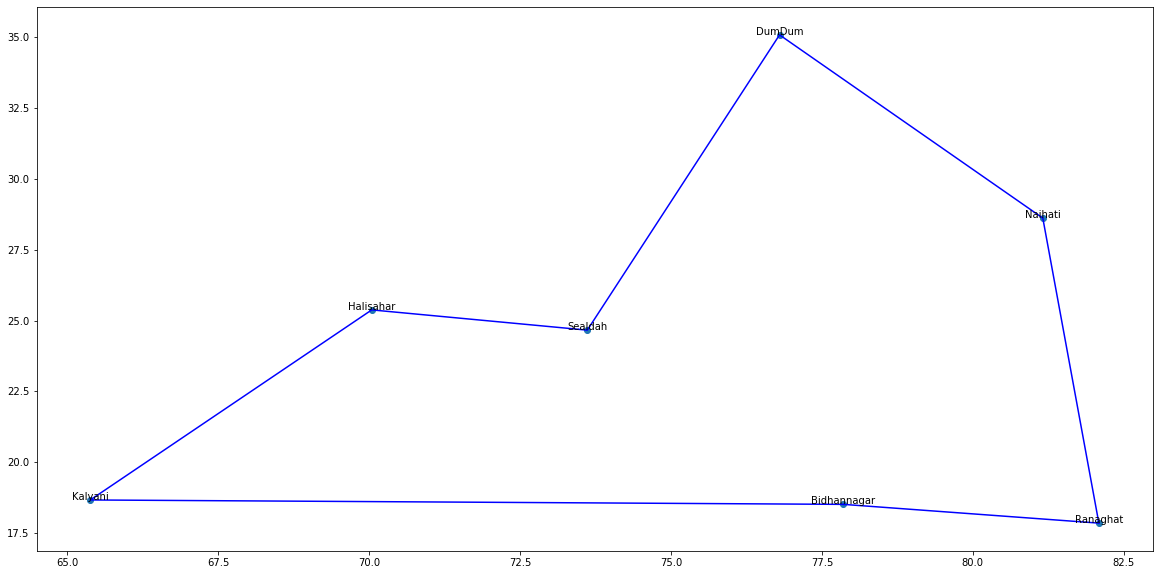

In [135]:
def GA(city_names,cities, population_size, eliteSize, mutat_rate, generations):
    population = initialPopulation(cities,population_size)
    #print(population_)
    print("Incipient distance: " + str(1 / path_ranking(population)[0][1]))
    for i in range(generations):
        population = next_gen(population, eliteSize, mutat_rate)
        #print(population)
    
    print("Eventual distance: " + str(1 / path_ranking(population)[0][1]))
    optimal_route_id = path_ranking(population)[0][0]
    optimal_route = population[optimal_route_id]
    ordered_cities = get_names(optimal_route,cities,city_names)
    print([(indx,val) for indx,val in enumerate(ordered_cities)])
    plot_p(optimal_route)
    return optimal_route

result_lst = GA(city_names,List_of_cities, population_size=100, 
                 eliteSize=5, mutat_rate=0.01, 
                 generations=500)

In [136]:
print(result_lst)

[[77.854255, 18.516726], [65.378105, 18.672019], [70.0411262, 25.3790092], [73.612347, 24.6648], [76.797371, 35.083656], [81.1588775, 28.618277], [82.08761, 17.85475]]
